In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from __future__ import print_function
import SimpleITK as sitk

import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

import gui
import registration_gui as rgui
import registration_utilities as ru # 사용 위치 확인
import registration_callbacks as rc # 사용 위치 확인
import utilities as util

from ipywidgets import interact, fixed
from IPython.display import clear_output
import os

In [3]:
INPUT_DIR = 'SB-10241-1'
OUTPUT_DIR = 'output'

if OUTPUT_DIR not in os.listdir():
    os.mkdir(OUTPUT_DIR)

In [4]:
def resample_image(itk_image, out_spacing=(1.0, 1.0, 1.0)):
    """
    Resample itk_image to new out_spacing
    :param itk_image: the input image
    :param out_spacing: the desired spacing
    :return: the resampled image
    """
    # get original spacing and size
    original_spacing = itk_image.GetSpacing()
    original_size = itk_image.GetSize()
    # calculate new size
    out_size = [
        int(np.round(original_size[0] * (original_spacing[0] / out_spacing[0]))),
        int(np.round(original_size[1] * (original_spacing[1] / out_spacing[1]))),
        int(np.round(original_size[2] * (original_spacing[2] / out_spacing[2])))
    ]
    # instantiate resample filter with properties and execute it
    resample = sitk.ResampleImageFilter()
    resample.SetOutputSpacing(out_spacing)
    resample.SetSize(out_size)
    resample.SetOutputDirection(itk_image.GetDirection())
    resample.SetOutputOrigin(itk_image.GetOrigin())
    resample.SetTransform(sitk.Transform())
    resample.SetDefaultPixelValue(itk_image.GetPixelIDValue())
    resample.SetInterpolator(sitk.sitkNearestNeighbor)
    return resample.Execute(itk_image)

In [10]:
times=[]
for filename in input_files:
    exp = filename.strip().split('.')[-1]
    if exp not in 'nii':
        continue
        
    time = filename.split('_')[1]
    times.append(time)
times=list(sorted(set(times)))
print(times)

['20160619230954', '20160919074927', '20170919192037']


In [13]:
input_files = os.listdir(INPUT_DIR)

pt_id = []
ymdhm = []
modality = []
images = []

for filename in input_files:
    exp = filename.strip().split('.')[-1]
    if exp not in 'nii':
        continue
    
    new_pt_id = filename.strip().split('_')[0].replace('-','')
    new_ymdhm = filename.strip().split('_')[1]
    new_modality = filename.strip().replace('.','_').split('_')[2].replace(' ','')
    
    pt_id.append(new_pt_id)
    ymdhm.append(new_ymdhm)
    modality.append(new_modality)
    
    ymdhm=list(set(ymdhm))
    #print(min(ymdhm))
    #print(new_ymdhm)
    if new_ymdhm == times[0]: 
        time='1st'
    elif new_ymdhm == times[1]:
        time='2nd'
    else: time='3rd'
    #print(time)
    globals()['i_{0}_{1}_{2}'.format(new_pt_id, new_modality, time)] = sitk.ReadImage(INPUT_DIR+ '/' + filename)
    images.append('i_{0}_{1}_{2}'.format(new_pt_id, new_modality, time))
    #gui.MultiImageDisplay([image], figure_size=(8,4))
    #print(filename)
    
pt_id=list(set(pt_id))
ymdhm=list(set(ymdhm))
modality=list(set(modality))
print(pt_id)
print(ymdhm)
print(modality)
print(images)

SB-10241-1_20170919192037_T1 GD.nii
SB-10241-1_20160919074927_MP RAGE.nii
SB-10241-1_20160619230954_T1.nii
SB-10241-1_20160619230954_TOF.nii
SB-10241-1_20160919074927_PD.nii
SB-10241-1_20160619230954_MP RAGE.nii
SB-10241-1_20160619230954_T1 GD.nii
SB-10241-1_20170919192037_TOF.nii
SB-10241-1_20170919192037_T1.nii
SB-10241-1_20160619230954_PD.nii
SB-10241-1_20160919074927_T1.nii
SB-10241-1_20160919074927_T1 GD.nii
SB-10241-1_20170919192037_MP RAGE.nii
SB-10241-1_20170919192037_PD.nii
SB-10241-1_20160919074927_TOF.nii
['SB102411']
['20170919192037', '20160919074927', '20160619230954']
['T1', 'TOF', 'PD', 'MPRAGE', 'T1GD']
['i_SB102411_T1GD_3rd', 'i_SB102411_MPRAGE_2nd', 'i_SB102411_T1_1st', 'i_SB102411_TOF_1st', 'i_SB102411_PD_2nd', 'i_SB102411_MPRAGE_1st', 'i_SB102411_T1GD_1st', 'i_SB102411_TOF_3rd', 'i_SB102411_T1_3rd', 'i_SB102411_PD_1st', 'i_SB102411_T1_2nd', 'i_SB102411_T1GD_2nd', 'i_SB102411_MPRAGE_3rd', 'i_SB102411_PD_3rd', 'i_SB102411_TOF_2nd']


In [16]:
var_list = []
for i in images:
    if i.split('_')[-2] not in ['roll', 'spin', 'TOF']:
        if i.split('_')[-1] =='1st':
            var_list.append(globals()[i]) 

<IPython.core.display.Javascript object>


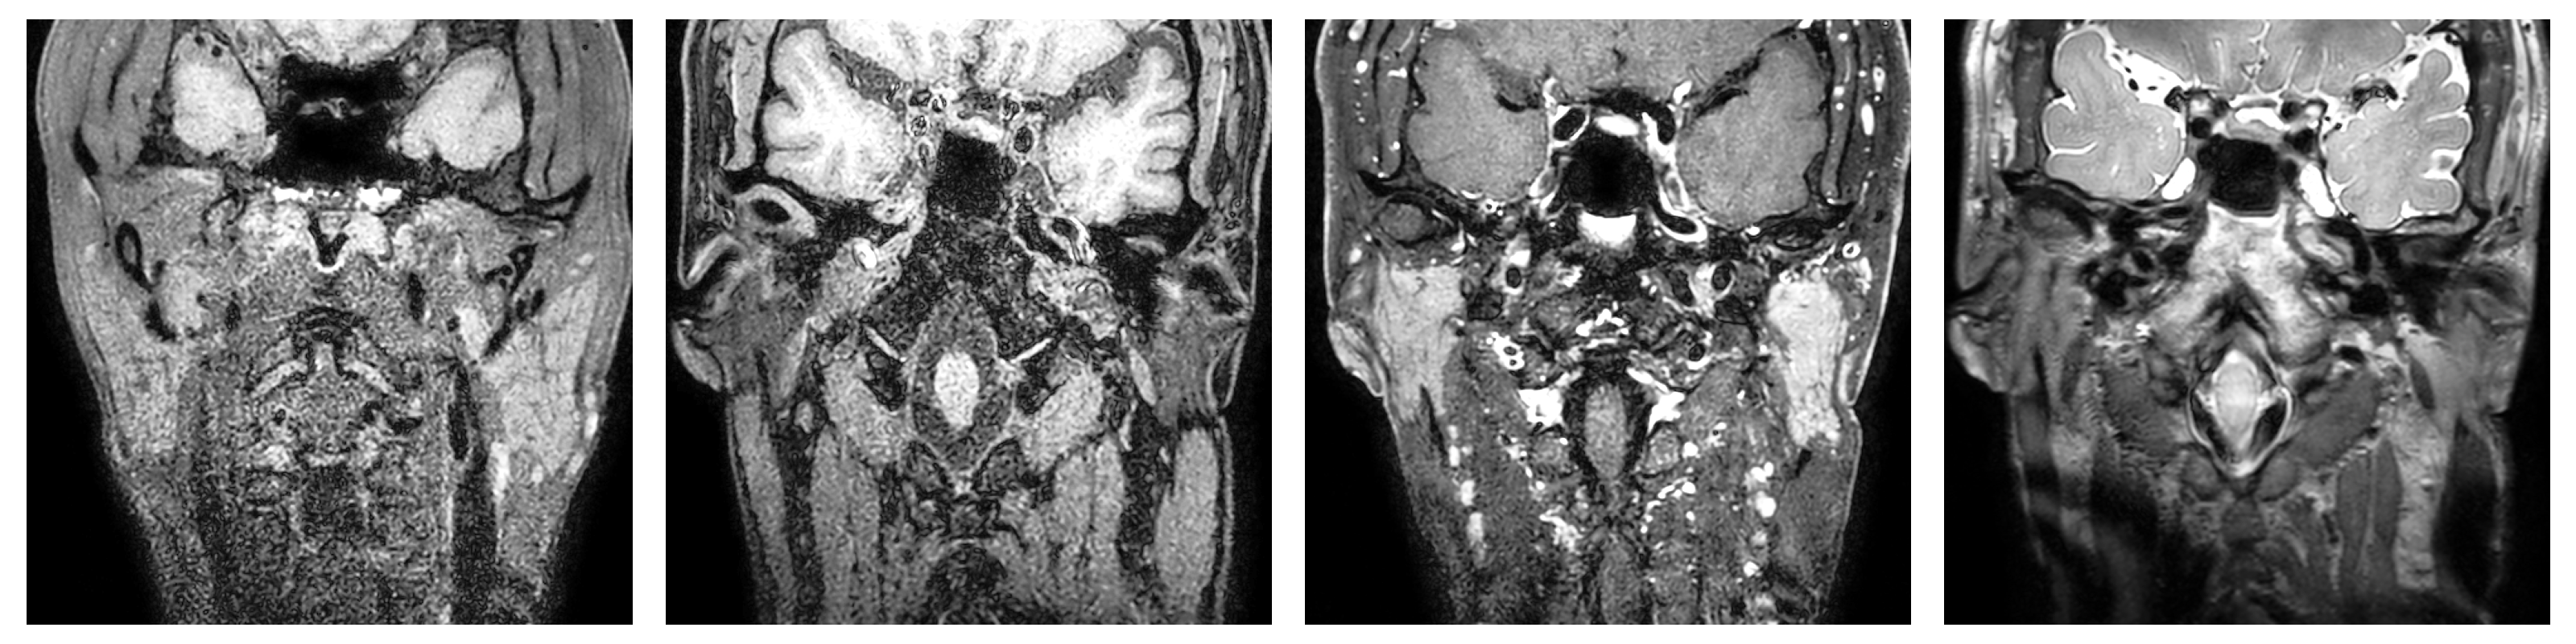

In [21]:
gui.MultiImageDisplay(var_list, figure_size=(20,5))